In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

* dlib 라이브러리를 이용해서 얼굴을 검출할 수 있다.

# 1. 이미지 불러오기

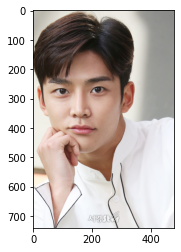

In [2]:
my_image_path=os.getenv('HOME')+'/aiffel/camera_sticker/images/r1.png'
img_bgr=cv2.imread(my_image_path)
img_show=img_bgr.copy()
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

* opencv에서 다룬 이미지는 BGR이라서 cv2.cvtColor를 이용하여 RGB로 변환한다.

# 2. 얼굴 검출

rectangles[[(22, 201) (290, 468)]]


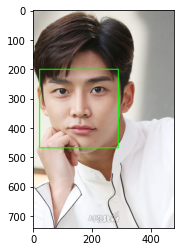

In [3]:
detector_hog=dlib.get_frontal_face_detector()
dlib_rects=detector_hog(img_rgb,1)
print(dlib_rects)

for dlib_rect in dlib_rects:
    l=dlib_rect.left()
    r=dlib_rect.right()
    t=dlib_rect.top()
    b=dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
    
img_show_rgb=cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

* detector_hog의 두번째 파라미터는 이미지 피라미드의 수
* detector_hog를 통해서 얼굴을 검출한다
* cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

# 3. 얼굴 랜드마크 

 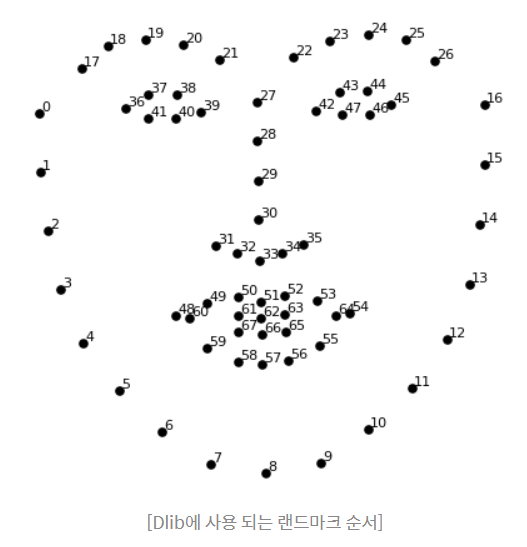

In [4]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

* 랜드마크 모델 불러오기

68


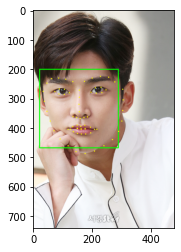

In [5]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

*  얼굴 영역 박스마다 face landmark를 찾아내고 좌표를 저장한다. 
* landmark는 68개

# 4. 스티커 적용하기

**1.스티커 위치**
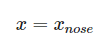
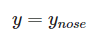
**2.스티커 크기**
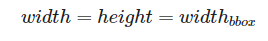

In [6]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(157, 345)
(x,y) : (157,345)
(w,h) : (269,269)


*  고양이수염을 코에 붙여주기위해서 인덱스 30번을 지정했다.

In [7]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(269, 269, 3)


* 고양이수염 이미지를 읽고 윗단계에서 계산한 크기로 resize 했다.

In [8]:
refined_x = x - w // 2
refined_y = y - h//2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (23,211)


* 원본이미지에 스티커를 추가하기위해 x,y좌표를 조정한다.
* 이미지 시작점은 top-left 좌표이다.

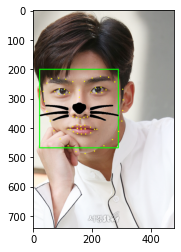

In [9]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

* np.where()에서 img_sticker값을 255로 지정해주어 스티커의 흰색배경을 없앴다.

# 5. 최종결과

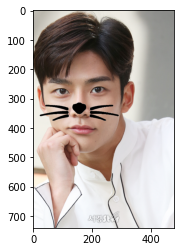

In [10]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 6. 여러가지 문제들 

## 1) 얼굴 각도가 틀어져있다면?

rectangles[[(201, 167) (356, 322)]]


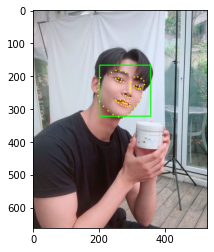

In [11]:
# 이미지 불러오기
my_image_path=os.getenv('HOME')+'/aiffel/camera_sticker/images/roun.png'
img_bgr=cv2.imread(my_image_path)
img_show=img_bgr.copy()
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

# 얼굴 검출
detector_hog=dlib.get_frontal_face_detector()
dlib_rects=detector_hog(img_rgb,1)
print(dlib_rects)

for dlib_rect in dlib_rects:
    l=dlib_rect.left()
    r=dlib_rect.right()
    t=dlib_rect.top()
    b=dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
    
img_show_rgb=cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [12]:
# 얼굴 틀어진 각도 계산하기
import math
tan_theta=(landmark[42][1]-landmark[39][1])/(landmark[42][0]-landmark[39][0])
theta=np.arctan(tan_theta)
angle=theta*180/math.pi
print(angle)

21.501434324047903


* 얼굴이 틀어진 각도 계산 과정
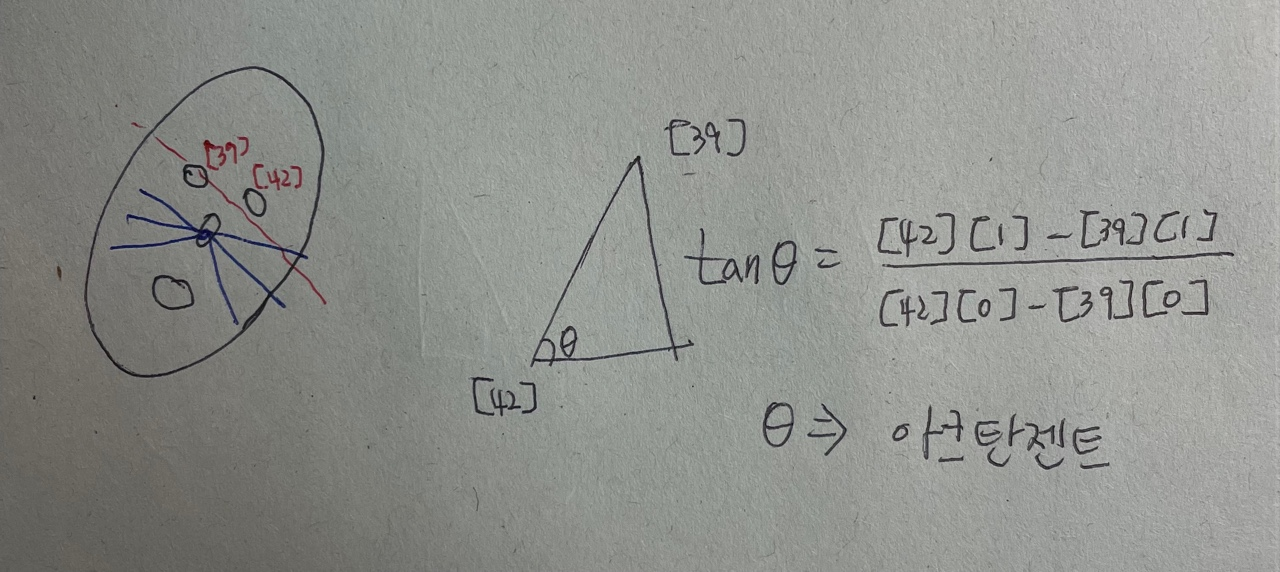

* 라디안에서 각도로 변환하기 위해서 180/ㅠ 를 곱해줬음

(294, 249)


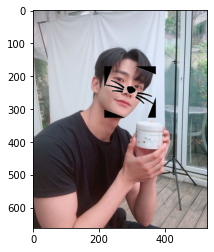

In [13]:
# 스티커 위치,크기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    
# 스티커 불러오기, 스티커 resize하기    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

# 원본이미지에 스티커를 추가하기위해 x,y좌표를 조정한다.
refined_x = x - w//2
refined_y = y - h//2

# 스티커가 들어갈 영역
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 각도에 맞춰서 스티커 회전시키기
matrix = cv2.getRotationMatrix2D((w//2,h//2), -angle, 1)
img_sticker = cv2.warpAffine(img_sticker, matrix, (w, h))

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 최종결과
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

* cv2.getRotationMatrix2D(center, angle, scale)
 * center: 회전 중심 좌표. (x, y) 튜플.
 * angle: (반시계 방향) 회전 각도(degree). 음수는 시계 방향.
 * scale: 추가적인 확대 비율
 
 
* cv2.warpAffine(src, M, dsize) : 이미지의 위치를 변경하는 변환
 * src – Image
 * M – 변환 행렬
 * dsize (tuple) – output image size(ex; (width=columns, height=rows)




## 2) 멀리서& 여러명 촬영한 사진

rectangles[[(213, 94) (249, 130)], [(285, 82) (321, 118)], [(369, 94) (405, 130)], [(509, 106) (545, 142)], [(445, 82) (481, 118)]]


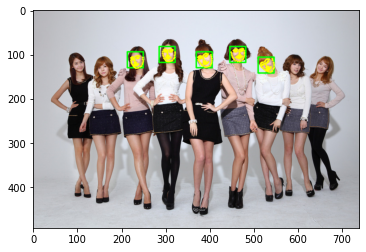

(230, 117)
(304, 101)
(386, 115)
(528, 128)
(467, 99)


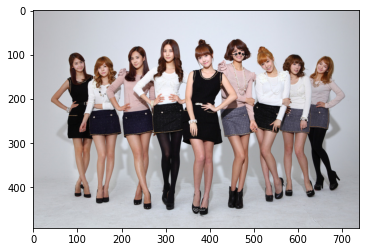

In [14]:
# 이미지 불러오기
my_image_path=os.getenv('HOME')+'/aiffel/camera_sticker/images/s.png'
img_bgr=cv2.imread(my_image_path)
img_show=img_bgr.copy()
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

# 얼굴 검출
detector_hog=dlib.get_frontal_face_detector()
dlib_rects=detector_hog(img_rgb,1)
print(dlib_rects)

for dlib_rect in dlib_rects:
    l=dlib_rect.left()
    r=dlib_rect.right()
    t=dlib_rect.top()
    b=dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
    
img_show_rgb=cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 위치,크기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    
# 스티커 불러오기, 스티커 resize하기    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

# 원본이미지에 스티커를 추가하기위해 x,y좌표를 조정한다.
refined_x = x - w//2
refined_y = y - h//2

# 스티커가 들어갈 영역
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 최종결과
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고
## 1. 스티커 붙일 때 문제점

고양이 수염 png로 적용 시 배경이 하얗게 나타나는 상황이 발생했다. np.where()에서 img_sticker값을  255로 지정해주어 스티커의 흰색 배경을 없앨 수 있었다.

!(https://s3-us-west-2.amazonaws.com/secure.notion-static.com/4607455c-5bf5-46ba-82cd-05c1260f4ac0/Untitled.png)

!(https://s3-us-west-2.amazonaws.com/secure.notion-static.com/99378185-022a-44a3-a678-4f37eb5d6fa9/Untitled.png)

## 2. 스티커를 회전시키기

틀어진 얼굴 각도를 표현하기 위해서 처음에는 코끝과 코 시작점을 사용했는데 각도를 보니 거의 90도에 가까웠다. 생각해보니 90도만큼이나 기울면 스티커가 세로로 붙여지는거나 마찬가지라서 각도를 눈과 눈 사이로 맞춰서 변경했다.

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/04158de3-b49e-476a-ad2a-963da62ab7b6/Untitled.jpeg)

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/b5583b53-e905-49be-807e-0e9199f39fa9/Untitled.jpeg)

스티커를 회전 시키기 위해 사용한 클래스

- cv2.getRotationMatrix2D(center, angle, scale)
    - center: 회전 중심 좌표. (x, y) 튜플.
    - angle: (반시계 방향) 회전 각도(degree). 음수는 시계 방향.
    - scale: 추가적인 확대 비율
- cv2.warpAffine(src, M, dsize) : 이미지의 위치를 변경하는 변환
    - src – Image
    - M – 변환 행렬
    - dsize (tuple) – output image size(ex; (width=columns, height=rows)

## 3. 여러명 있을 때

얼굴인식은 여러명이 됐으나 스티커의 영광을 받은 사람은 수영뿐... 

시간문제로 문제를 해결하지 못했다.
